<a href="https://colab.research.google.com/github/SBL-Kimlab/TaxaAssignpy/blob/master/TaxaAssignpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Result Summary
Total sample #      :	5
Total read #        :	333522
Filtered read #     :	305002
Defined OTU #       :	335
Assigned taxonomy # :	55

---------------------------------------------------------------------


domain level taxonomy


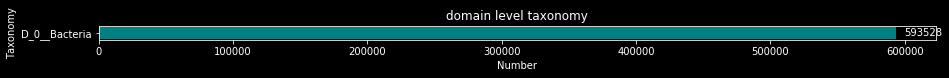



phylum level taxonomy


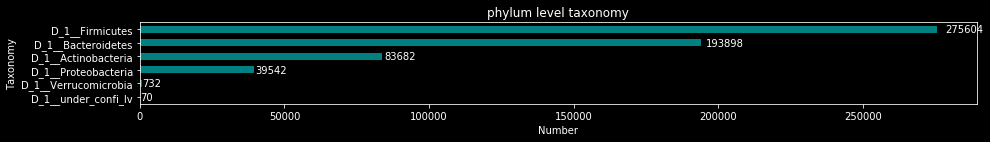



class level taxonomy


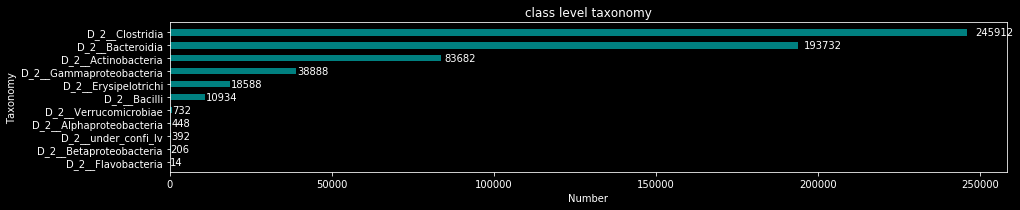



order level taxonomy


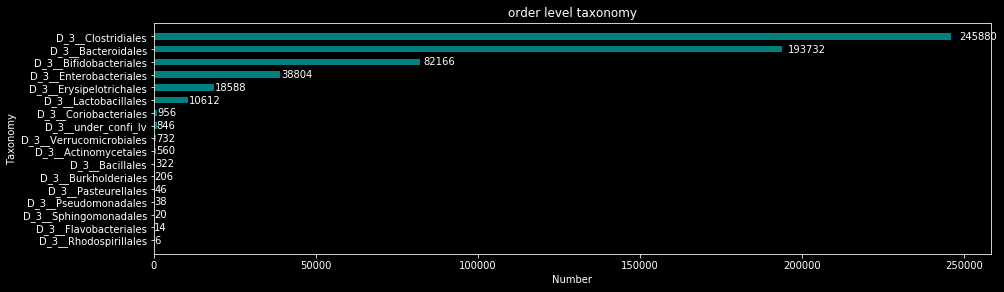



family level taxonomy


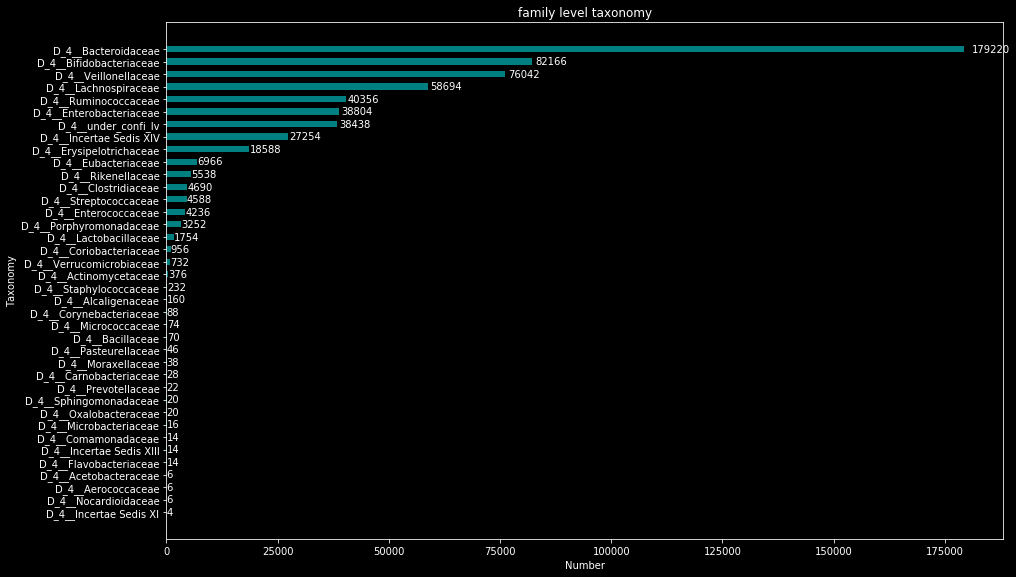



genus level taxonomy


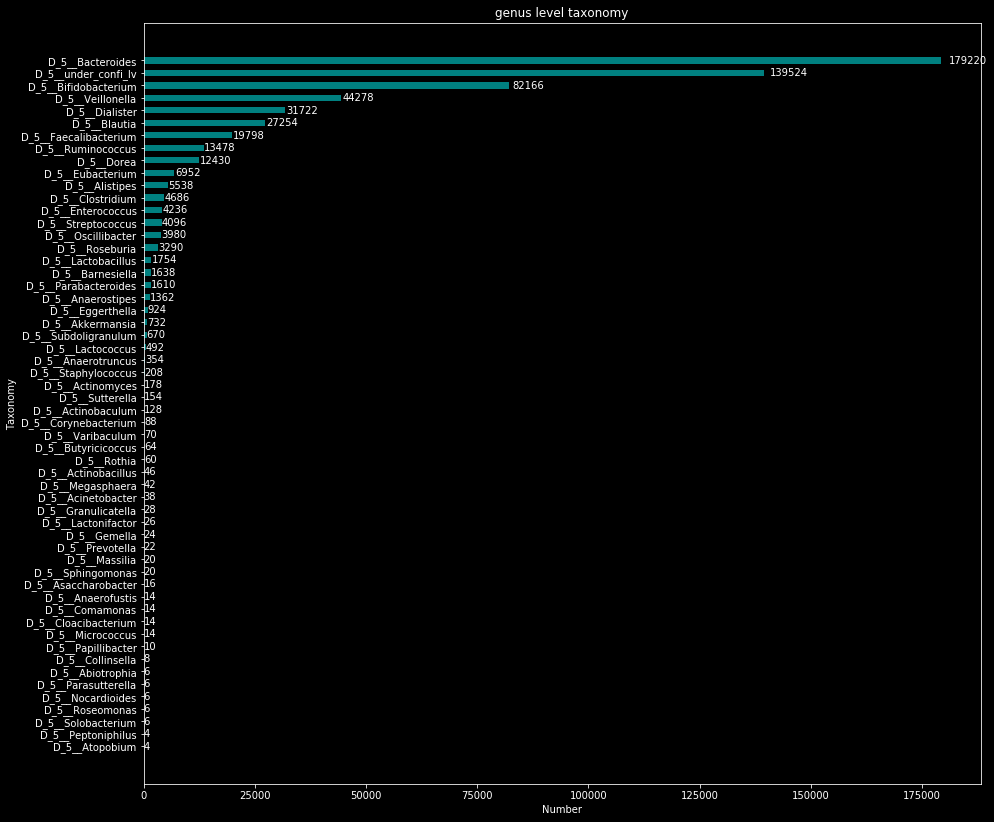

Pipeline time consume : 3.0 Min 20 sec
Total step time consume : 8.0 Min 7 sec


In [0]:
# directory (or name) of the folder which has fastq files

path = "fastq_zip"

###   Mounting Google Drive   ###
from google.colab import drive
drive.mount('/content/drive')

###   Install Preprocess Programs   ###
import sys
import os
import time
start_time = time.time()
!apt update -y
!apt install vsearch -y
!pip install biopython
!wget https://repo.anaconda.com/archive/Anaconda3-5.2.0-Linux-x86_64.sh && bash Anaconda3-5.2.0-Linux-x86_64.sh -bfp /usr/local
sys.path.append('/usr/local/lib/python3.6/site-packages')
os.remove('Anaconda3-5.2.0-Linux-x86_64.sh')
!conda install -n root _license -y
!conda install -c bioconda rdp_classifier -y

###   Clone TaxaAssignpy github   ###
!git clone https://github.com/SBL-Kimlab/TaxaAssignpy.git

import shutil
from_ = "/content/TaxaAssignpy/TaxaAssign.py"
to_ = "TaxaAssign.py"
shutil.copy(from_, to_)

###   Run the pipeline   ###
import TaxaAssign
path_ = '/content/drive/My Drive/%s/' % path

#TaxaAssign.taxaassign( path_ )
#TaxaAssign.taxaassign.fastq_merge()
#TaxaAssign.taxaassign.fastq_filtering()
#TaxaAssign.taxaassign.OTU_defining()
#TaxaAssign.taxaassign.taxonomy_assigning()
#TaxaAssign.taxaassign.analysis_statistic()
#TaxaAssign.taxaassign.result_summary()
TaxaAssign.autorun_all( path_ )

###   Save the result to drive   ###
from_ = "/content/TaxaAssign/result"
to_ = path_ + "result"

if os.path.exists( to_ ):
    shutil.rmtree( to_ )
shutil.copytree( from_, to_ )

end_time = time.time() - start_time
print( "Total step time consume : %s Min %s sec" % ( end_time // 60, int( end_time ) % 60 ) )